<a href="https://colab.research.google.com/github/arghya53/TimeSeriesAnalysis/blob/main/MultiVariateTimeSeriesModelingUsingLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project we are going to apply multivariate(Appliances, lights, T_out,	RH_1, Visibility) time series analysis on an LSTM model in order to predict usage of appliances.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)

Attribute Info:

1.   datetime y-m-d h:m:s
2.   light: energy use of light in the house in Wh
3.   T1 : temp in kitchen area in degree Celsius
4.   RM_1 : Humidity in kitchen area, in  %
5.   T2 : temp in living room area, in degree Celsius
6.   RM_2: Humidity in living room area, in %
7.   T3, Temp in laundry area
8.   RM_3, Humidity in laundry area, in %
9.   T4, temp in office room, in celsius
10.  RM_4, humidity in office room, in %
9.   T5, temp in bathroom, in celsius
10.  RM_5, humidity in bathroom, in %
9.   T6, temp outside building(north side), in celsius
10.  RM_6, humidity outside building(north side), in %
9.   T7, temp in ironing room, in celsius
10.  RM_7, humidity in ironing room, in %
9.   T8, temp in teenager room, in celsius
10.  RM_8, humidity in teenager room, in %
9.   T9, temp in parents room, in celsius
10.  RM_9, humidity in parents room, in %
9.   To, temp outside(from Chievers weather station), in celsius
10.  Pressure (from Chievers weather station), in mmHg
1.   RM_out, humidity outside(from Chievers weather station), in %
2.   Wind Speed outside(from Chievers weather station), in m/s
1.   Visibility, outside(from Chievers weather station), in km
2.   Tdewpoint, (from Chievers weather station), in degree celsius
1.   rv1, random variable 1, nondimensional
2.   rv2, random variable 2, nondimensional










array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

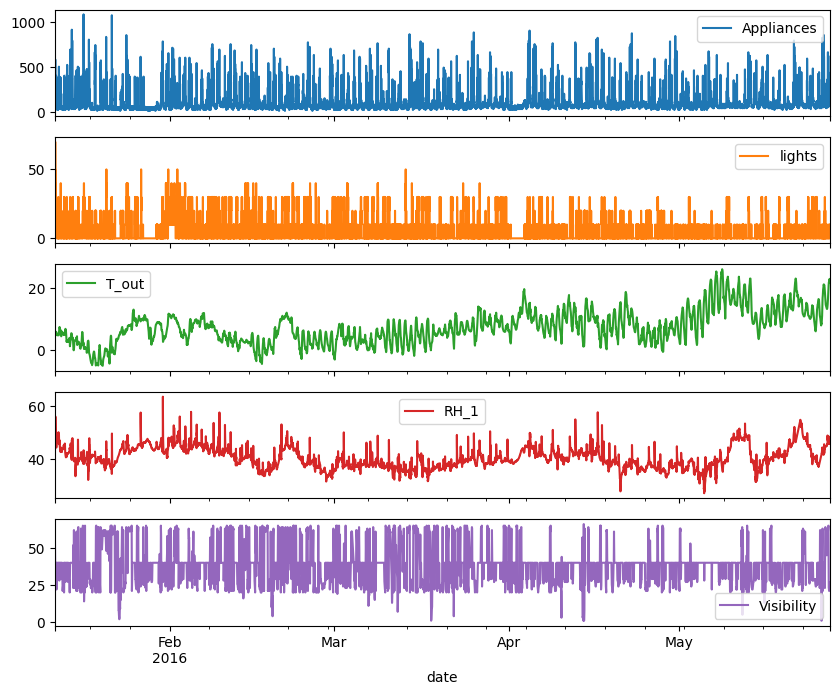

In [ ]:
df.set_index('date')[['Appliances', 'lights', 'T_out', 'RH_1', 'Visibility']].plot(subplots=True)

In [ ]:
df_input = df[['Appliances', 'lights', 'T_out', 'RH_1', 'Visibility']]

In [ ]:
df_input.head()

,Appliances,lights,T_out,RH_1,Visibility
0,60,30,6.600000,47.596667,63.000000
1,60,30,6.483333,46.693333,59.166667
2,50,30,6.366667,46.300000,55.333333
3,50,40,6.250000,46.066667,51.500000
4,60,40,6.133333,46.333333,47.666667


In [ ]:
df_input.describe()

,Appliances,lights,T_out,RH_1,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,7.411665,40.259739,38.330834
std,102.524891,7.935988,5.317409,3.979299,11.794719
min,10.000000,0.000000,-5.000000,27.023333,1.000000
25%,50.000000,0.000000,3.666667,37.333333,29.000000
50%,60.000000,0.000000,6.916667,39.656667,40.000000
75%,100.000000,0.000000,10.408333,43.066667,40.000000
max,1080.000000,70.000000,26.100000,63.360000,66.000000


In [ ]:
df_input.query('Appliances>500')

,Appliances,lights,T_out,RH_1,Visibility
11,580,60,5.983333,46.396667,40.000000
314,520,0,2.900000,41.530000,36.333333
392,550,10,2.033333,43.433333,40.000000
393,690,10,2.100000,43.766667,40.000000
394,620,10,2.166667,43.693333,40.000000
...,...,...,...,...,...
19586,600,0,20.833333,44.066667,40.000000
19587,520,0,20.900000,43.366667,40.000000
19684,580,0,15.900000,47.226667,61.000000
19685,660,0,16.100000,47.693333,61.000000


In order to converge the gradient descent faster, scaling of data is required before feeding it into neural network model. To achieve a standard mean, and standard deviation, scaling is required.

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [ ]:
data_scaled

array([[0.04672897, 0.42857143, 0.37299035, 0.56618659, 0.95384615],
       [0.04672897, 0.42857143, 0.36923901, 0.54132648, 0.89487179],
       [0.03738318, 0.42857143, 0.36548767, 0.53050179, 0.83589744],
       ...,
       [0.24299065, 0.14285714, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.14285714, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.14285714, 0.87459807, 0.53875791, 0.4       ]])

In [ ]:
features = data_scaled
target = data_scaled[:,0] # all rows and first column i.e. the appliances column

In [ ]:
ts_gen =TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)

In [ ]:
ts_gen[0] # we have fitted first 20(2*10) mins of data and going to predict the appliance usage for the next interval
          # the input is multivariate data('Appliances', 'lights', 'T_out', 'RH_1', 'Visibility') and output is a univariate (appliances) one

(array([[[0.04672897, 0.42857143, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.42857143, 0.36923901, 0.54132648, 0.89487179]]]),
 array([0.03738318]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123, shuffle=False)
 # as it is a time series data, so we can't shuffle it randomly

In [ ]:
x_train.shape

(15788, 5)

In [ ]:
x_test.shape

(3947, 5)

In [ ]:
win_length = 720  # five days data
batch_size = 32
num_features = 5
train_generator = TimeseriesGenerator(x_train, y_train, length= win_length, batch_size=batch_size, sampling_rate=1)
test_generator = TimeseriesGenerator(x_test, y_test, length= win_length, batch_size=batch_size, sampling_rate=1)

In [ ]:
train_generator[0] # it will contain 32 observations at a time each having 720 observations and each of 720 has 5 features

(array([[[0.04672897, 0.42857143, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.42857143, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.42857143, 0.36548767, 0.53050179, 0.83589744],
         ...,
         [0.06542056, 0.14285714, 0.25241158, 0.31584258, 0.79230769],
         [0.05607477, 0.28571429, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.28571429, 0.22561629, 0.31107238, 0.66410256]],
 
        [[0.04672897, 0.42857143, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.42857143, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.57142857, 0.36173633, 0.52408036, 0.77692308],
         ...,
         [0.05607477, 0.28571429, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.28571429, 0.22561629, 0.31107238, 0.66410256],
         [0.06542056, 0.28571429, 0.21221865, 0.30923768, 0.6       ]],
 
        [[0.03738318, 0.42857143, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.57142857, 0.3617363

 Now we are going to define our LSTM model.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 720, 128)          68608     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 720, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout (Dropout)           (None, 720, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

Dropout Layers: This layer ensures that certain neurons are "dropped out" or temporarily ignored during training to avoid overfitting. Ensures that the model learns more robust and general features.

---
Activation functions(Leaky ReLU, Sigmoid, Hyperbolic Tangent) enable neural networks to approximate non-linear functions, making them capable of modeling complex data.
Activation functions help propagate gradients during backpropagation, allowing the network to learn from the training data.


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=2,
                                                  mode= 'min')
model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])
history = model.fit_generator(train_generator, epochs=50,
                              validation_data = test_generator,
                              shuffle=False,
                              callbacks=[early_stopping])

Epoch 1/50


<ipython-input-25-af60e0e9b4e5>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=50,


471/471 [==============================] - 39s 71ms/step - loss: 0.0040 - mean_absolute_error: 0.0309 - val_loss: 0.0032 - val_mean_absolute_error: 0.0289
Epoch 2/50
471/471 [==============================] - 33s 70ms/step - loss: 0.0040 - mean_absolute_error: 0.0308 - val_loss: 0.0031 - val_mean_absolute_error: 0.0265
Epoch 3/50
471/471 [==============================] - 33s 70ms/step - loss: 0.0039 - mean_absolute_error: 0.0305 - val_loss: 0.0032 - val_mean_absolute_error: 0.0271
Epoch 4/50
471/471 [==============================] - 33s 69ms/step - loss: 0.0039 - mean_absolute_error: 0.0303 - val_loss: 0.0031 - val_mean_absolute_error: 0.0272


Early stopping is implemented using the tf.keras.callbacks.EarlyStopping callback. It monitors the validation loss, and if the loss doesn't improve for two consecutive epochs (patience=2) in a minimizing fashion (mode='min'), training is stopped early.

In [ ]:
model.evaluate(test_generator)

101/101 [==============================] - 4s 40ms/step - loss: 0.0031 - mean_absolute_error: 0.0272


[0.003140141488984227, 0.02723102644085884]

Now, we are going to predict the value and compare it to the actual value.

In [ ]:
predictions = model.predict(test_generator)

101/101 [==============================] - 3s 27ms/step


In [ ]:
predictions

array([[0.06039554],
       [0.09381042],
       [0.12970671],
       ...,
       [0.07951732],
       [0.25517115],
       [0.25850737]], dtype=float32)

In [ ]:
predictions.shape

(3227, 1)

We can see that there is a difference of 720 values between test shape and shape of prediction. It is because the window length is 720. It skips the first 720 values

As our prediction is an scaled one, so we need to inverse of the scaling and then compare.

In [ ]:
y_test

array([0.3364486 , 0.54205607, 0.28971963, ..., 0.24299065, 0.38317757,
       0.39252336])

In [ ]:
x_test

array([[0.3364486 , 0.        , 0.34297964, 0.30923768, 0.6       ],
       [0.54205607, 0.        , 0.34726688, 0.3055683 , 0.6       ],
       [0.28971963, 0.        , 0.35155413, 0.30455921, 0.6       ],
       ...,
       [0.24299065, 0.14285714, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.14285714, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.14285714, 0.87459807, 0.53875791, 0.4       ]])

In [ ]:
x_test[:, 1:][win_length:] # we are considering all the data from the first column till the end, skipping the first 720 timestamps

array([[0.        , 0.45337621, 0.20851298, 0.6       ],
       [0.14285714, 0.47106109, 0.18282726, 0.6       ],
       [0.        , 0.48874598, 0.18466196, 0.6       ],
       ...,
       [0.14285714, 0.88317256, 0.53866618, 0.37435897],
       [0.14285714, 0.87888532, 0.54949087, 0.38717949],
       [0.14285714, 0.87459807, 0.53875791, 0.4       ]])

In [ ]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])], axis=1) # we built one dataframe with actual and predicted values

In [ ]:
df_pred

,0,0,1,2,3
0,0.060396,0.000000,0.453376,0.208513,0.600000
1,0.093810,0.142857,0.471061,0.182827,0.600000
2,0.129707,0.000000,0.488746,0.184662,0.600000
3,0.352921,0.000000,0.506431,0.193996,0.600000
4,0.146609,0.000000,0.524116,0.181818,0.600000
...,...,...,...,...,...
3222,0.085259,0.000000,0.891747,0.537657,0.348718
3223,0.095418,0.000000,0.887460,0.536006,0.361538
3224,0.079517,0.142857,0.883173,0.538666,0.374359
3225,0.255171,0.142857,0.878885,0.549491,0.387179


In [ ]:
inv_trans = scaler.inverse_transform(df_pred)

In [ ]:
inv_trans

array([[ 74.62322652,   0.        ,   9.1       ,  34.6       ,
         40.        ],
       [110.37714593,  10.        ,   9.65      ,  33.66666667,
         40.        ],
       [148.78618032,   0.        ,  10.2       ,  33.73333333,
         40.        ],
       ...,
       [ 95.08353218,  10.        ,  22.46666667,  46.59666667,
         25.33333333],
       [283.03313047,  10.        ,  22.33333333,  46.99      ,
         26.16666667],
       [286.60288692,  10.        ,  22.2       ,  46.6       ,
         27.        ]])

In [ ]:
df_final = df_input[predictions.shape[0]*-1:]  # it is considering the values of last 3227 timeframes

In [ ]:
df_final.count()  # so it matches our prediction frame on the top

Appliances    3227
lights        3227
T_out         3227
RH_1          3227
Visibility    3227
dtype: int64

In [ ]:
df_final['App_Pred'] = inv_trans[:,0]

<ipython-input-49-259dad3460ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['App_Pred'] = inv_trans[:,0]


In [ ]:
df_final

,Appliances,lights,T_out,RH_1,Visibility,App_Pred
16508,90,0,9.100000,34.600000,40.000000,74.623227
16509,120,10,9.650000,33.666667,40.000000,110.377146
16510,390,0,10.200000,33.733333,40.000000,148.786180
16511,240,0,10.750000,34.072500,40.000000,387.625448
16512,120,0,11.300000,33.630000,40.000000,166.872085
...,...,...,...,...,...,...
19730,100,0,22.733333,46.560000,23.666667,101.227503
19731,90,0,22.600000,46.500000,24.500000,112.097585
19732,270,10,22.466667,46.596667,25.333333,95.083532
19733,420,10,22.333333,46.990000,26.166667,283.033130


<Axes: >

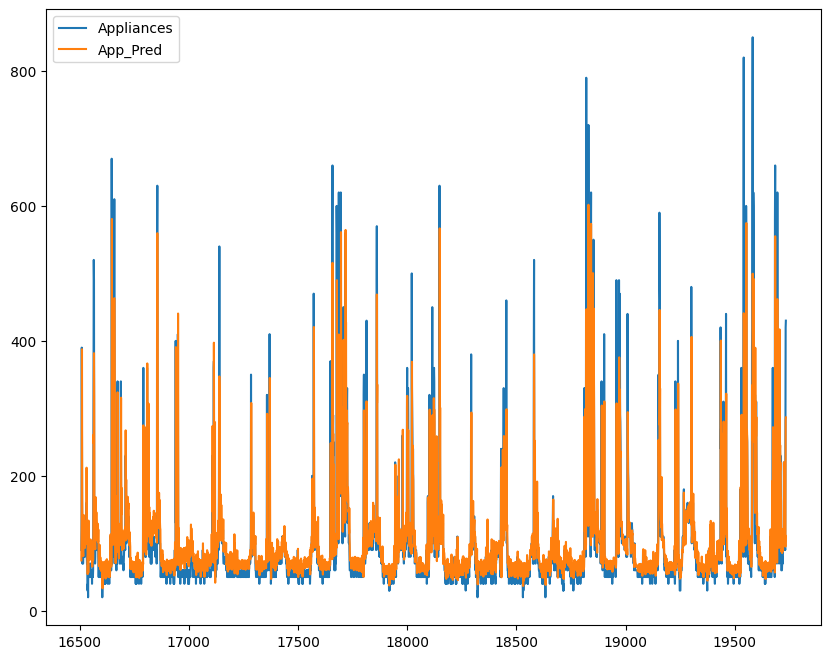

In [ ]:
df_final[['Appliances','App_Pred']].plot()

Probable way of increasing the predictability is to detrend the data and pass it or we can built features that can complement this trend data. We can also consider other set of features to watch the corrleation and make our model as accurate as possible.